## **Predicting Medical Entrance Exam Performance**

### 📝 Introduction

- **Purpose**: This notebook outlines a data science project to analyze and predict student performance in a medical entrance exam using the "Student Performance on an Entrance Examination" dataset.
- **Dataset Source**: UCI Machine Learning Repository.
- **Environment**: Google Colab for data analysis, modeling, and saving artifacts.
- **Project Goals**:
  - Conduct Exploratory Data Analysis (EDA) to uncover factors influencing exam performance.
  - Build and evaluate machine learning models to predict student success (e.g., Pass/Fail).
  - Identify key predictors for actionable insights.
  - Save the best model and preprocessing artifacts for deployment.
  - Create visualizations via Power BI and Excel dashboards.

---

### 📊 Dataset Description

- **Overview**:
  - **Name**: Student Performance on an Entrance Examination.
  - **Instances**: 666 students.
  - **Features**: 12 (11 independent + 1 target).
  - **Task**: Classification (predicting performance).
  - **Collected By**: Prof. Jiten Hazarika.
- **Objective**: Analyze academic, demographic, and socio-economic factors affecting medical entrance exam performance in Assam, India.

**Dataset Columns**:

---

| **Column Name**              | **Type**         | **Category**         | **Description**                                                                 |
|------------------------------|------------------|----------------------|--------------------------------------------------------------------------------|
| Performance                  | Target (Categorical) |                   | Student performance in the entrance exam .                   |
| Gender                       | Categorical      | Demographic          | Student gender (Male/Female).                                                 |
| Caste                        | Categorical      | Demographic          | Social category/class of the student.                                         |
| coaching                     | Categorical      | Academic             | Coaching status (Inside Assam, Outside Assam, None).                          |
| Class_ten_education          | Categorical      | Academic             | Education board for Class X.                                                  |
| twelve_education             | Categorical      | Academic             | Education board for Class XII.                                                |
| medium                       | Categorical      | Academic             | Medium of instruction in Class XII.                                           |
| Class_X_Percentage           | Categorical        | Academic             | Rating in Class X.                                                  |
| Class_XII_Percentage         | Categorical        | Academic             | Rating in Class XII.                                                |
| Father_occupation            | Categorical      | Socio-economic       | Occupation of the student's father.                                           |
| Mother_occupation            | Categorical      | Socio-economic       | Occupation of the student's mother.                                           |
| time                | Categorical      | Academic         | Number of attempts taken to pass the entrance exam (e.g., ONE, TWO, THREE).   |

---

### 📑 Notebook Content Structure

- **Sections**:
  - Import Libraries & Load Data: Set up libraries and load the dataset.
  - Data Cleaning & Preparation: Address any data issues.
  - Exploratory Data Analysis (EDA):
    - Univariate Analysis: Distributions of individual features.
    - Bivariate Analysis: Relationships between features and target.
    - EDA Insights: Key findings summary.
  - Data Preprocessing: Prepare data for modeling (encoding, scaling, splitting).
  - Modeling: Train and evaluate multiple machine learning models.
  - Model Selection & Saving: Save the best model and preprocessing artifacts.
  - Conclusion & Next Steps: Summarize findings.




# Import Libraries

Install the ucimlrepo package

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install mord

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import OneHotEncoder ,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, mean_absolute_error, confusion_matrix, classification_report
from xgboost import XGBClassifier
from mord import LogisticAT

import joblib


## Ignores warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Sets pandas display options for better output formatting

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load Data

In [6]:
student_performance_on_an_entrance_examination = fetch_ucirepo(id=582)

student_performance = pd.concat([student_performance_on_an_entrance_examination.data.features,
                       student_performance_on_an_entrance_examination.data.targets], axis=1)

## Displaying a Random Sample of the Data

In [7]:
student_performance.sample(7)

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
151,male,General,WA,CBSE,CBSE,ENGLISH,Vg,Good,SCHOOL_TEACHER,HOUSE_WIFE,THREE,Vg
433,male,General,NO,SEBA,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,ONE,Good
540,female,SC,NO,SEBA,AHSEC,ASSAMESE,Average,Good,BUSINESS,HOUSE_WIFE,TWO,Average
484,female,OBC,WA,SEBA,AHSEC,ASSAMESE,Excellent,Vg,BUSINESS,OTHERS,FOUR,Good
221,female,General,OA,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,SCHOOL_TEACHER,TWO,Vg
343,male,General,NO,CBSE,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,SCHOOL_TEACHER,ONE,Good
653,female,ST,NO,SEBA,AHSEC,ENGLISH,Average,Average,SCHOOL_TEACHER,HOUSE_WIFE,THREE,Average


The columns `Class_X_Percentage` and `Class_XII_Percentage` in the dataset contain categorical grades (e.g., "Excellent," "Good," "Vg") instead of numerical percentages, which is misleading based on their names. To make the column names more accurate and intuitive for anyone reading the notebook, i’ll rename them to reflect that they represent `grades`, not `percentages`.

In [8]:
student_performance.rename(columns={
    'Class_X_Percentage': 'Class_X_Grade',
    'Class_XII_Percentage': 'Class_XII_Grade'
}, inplace=True)

## Displaying Data Information

In [9]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               666 non-null    object
 1   Caste                666 non-null    object
 2   coaching             666 non-null    object
 3   Class_ten_education  666 non-null    object
 4   twelve_education     666 non-null    object
 5   medium               666 non-null    object
 6   Class_X_Grade        666 non-null    object
 7   Class_XII_Grade      666 non-null    object
 8   Father_occupation    666 non-null    object
 9   Mother_occupation    666 non-null    object
 10  time                 666 non-null    object
 11  Performance          666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


## Check Missing Values

In [10]:
student_performance.isnull().sum()

,0
Gender,0
Caste,0
coaching,0
Class_ten_education,0
twelve_education,0
medium,0
Class_X_Grade,0
Class_XII_Grade,0
Father_occupation,0
Mother_occupation,0


# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Summary statistics

In [11]:
student_performance.describe()

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Grade,Class_XII_Grade,Father_occupation,Mother_occupation,time,Performance
count,666,666,666,666,666,666,666,666,666,666,666,666
unique,2,4,3,3,3,3,4,4,8,9,6,4
top,male,General,WA,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE,TWO,Good
freq,355,329,449,396,368,536,511,398,277,442,368,210


To make the coaching column more readable and clear for analysis, i’ll replace the abbreviated values (`WA`, `NO`, `OA`) with their full descriptions (`Within Assam`, `No Coaching`, `Outside Assam`)

In [12]:
student_performance['coaching'] = student_performance['coaching'].replace({
    'WA': 'Within Assam',
    'NO': 'No Coaching',
    'OA': 'Outside Assam'
})

### Let's visualize them 📊

In [13]:
def plot_categorical_distributions(df, palette="viridis"):

    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    num_cols = len(categorical_columns)

    if num_cols == 0:
        print("No categorical columns found!")
        return

    cols_per_row = 2
    rows = int(np.ceil(num_cols / cols_per_row))

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
    axes = axes.flatten()

    sns.set_theme(style="whitegrid")

    for i, col in enumerate(categorical_columns):
        ax = axes[i]

        # Get value counts and percentages
        counts = df[col].value_counts()
        percentages = (counts / counts.sum()) * 100

        sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette)
        for p, percentage in zip(ax.patches, percentages):
            ax.annotate(f'{int(p.get_height())} ({percentage:.1f}%)',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

        ax.set_title(f"Distribution of {col}", fontsize=13, fontweight="bold")
        ax.set_xlabel("")
        ax.set_ylabel("Count", fontsize=12)
        ax.tick_params(axis='x', rotation=30)

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

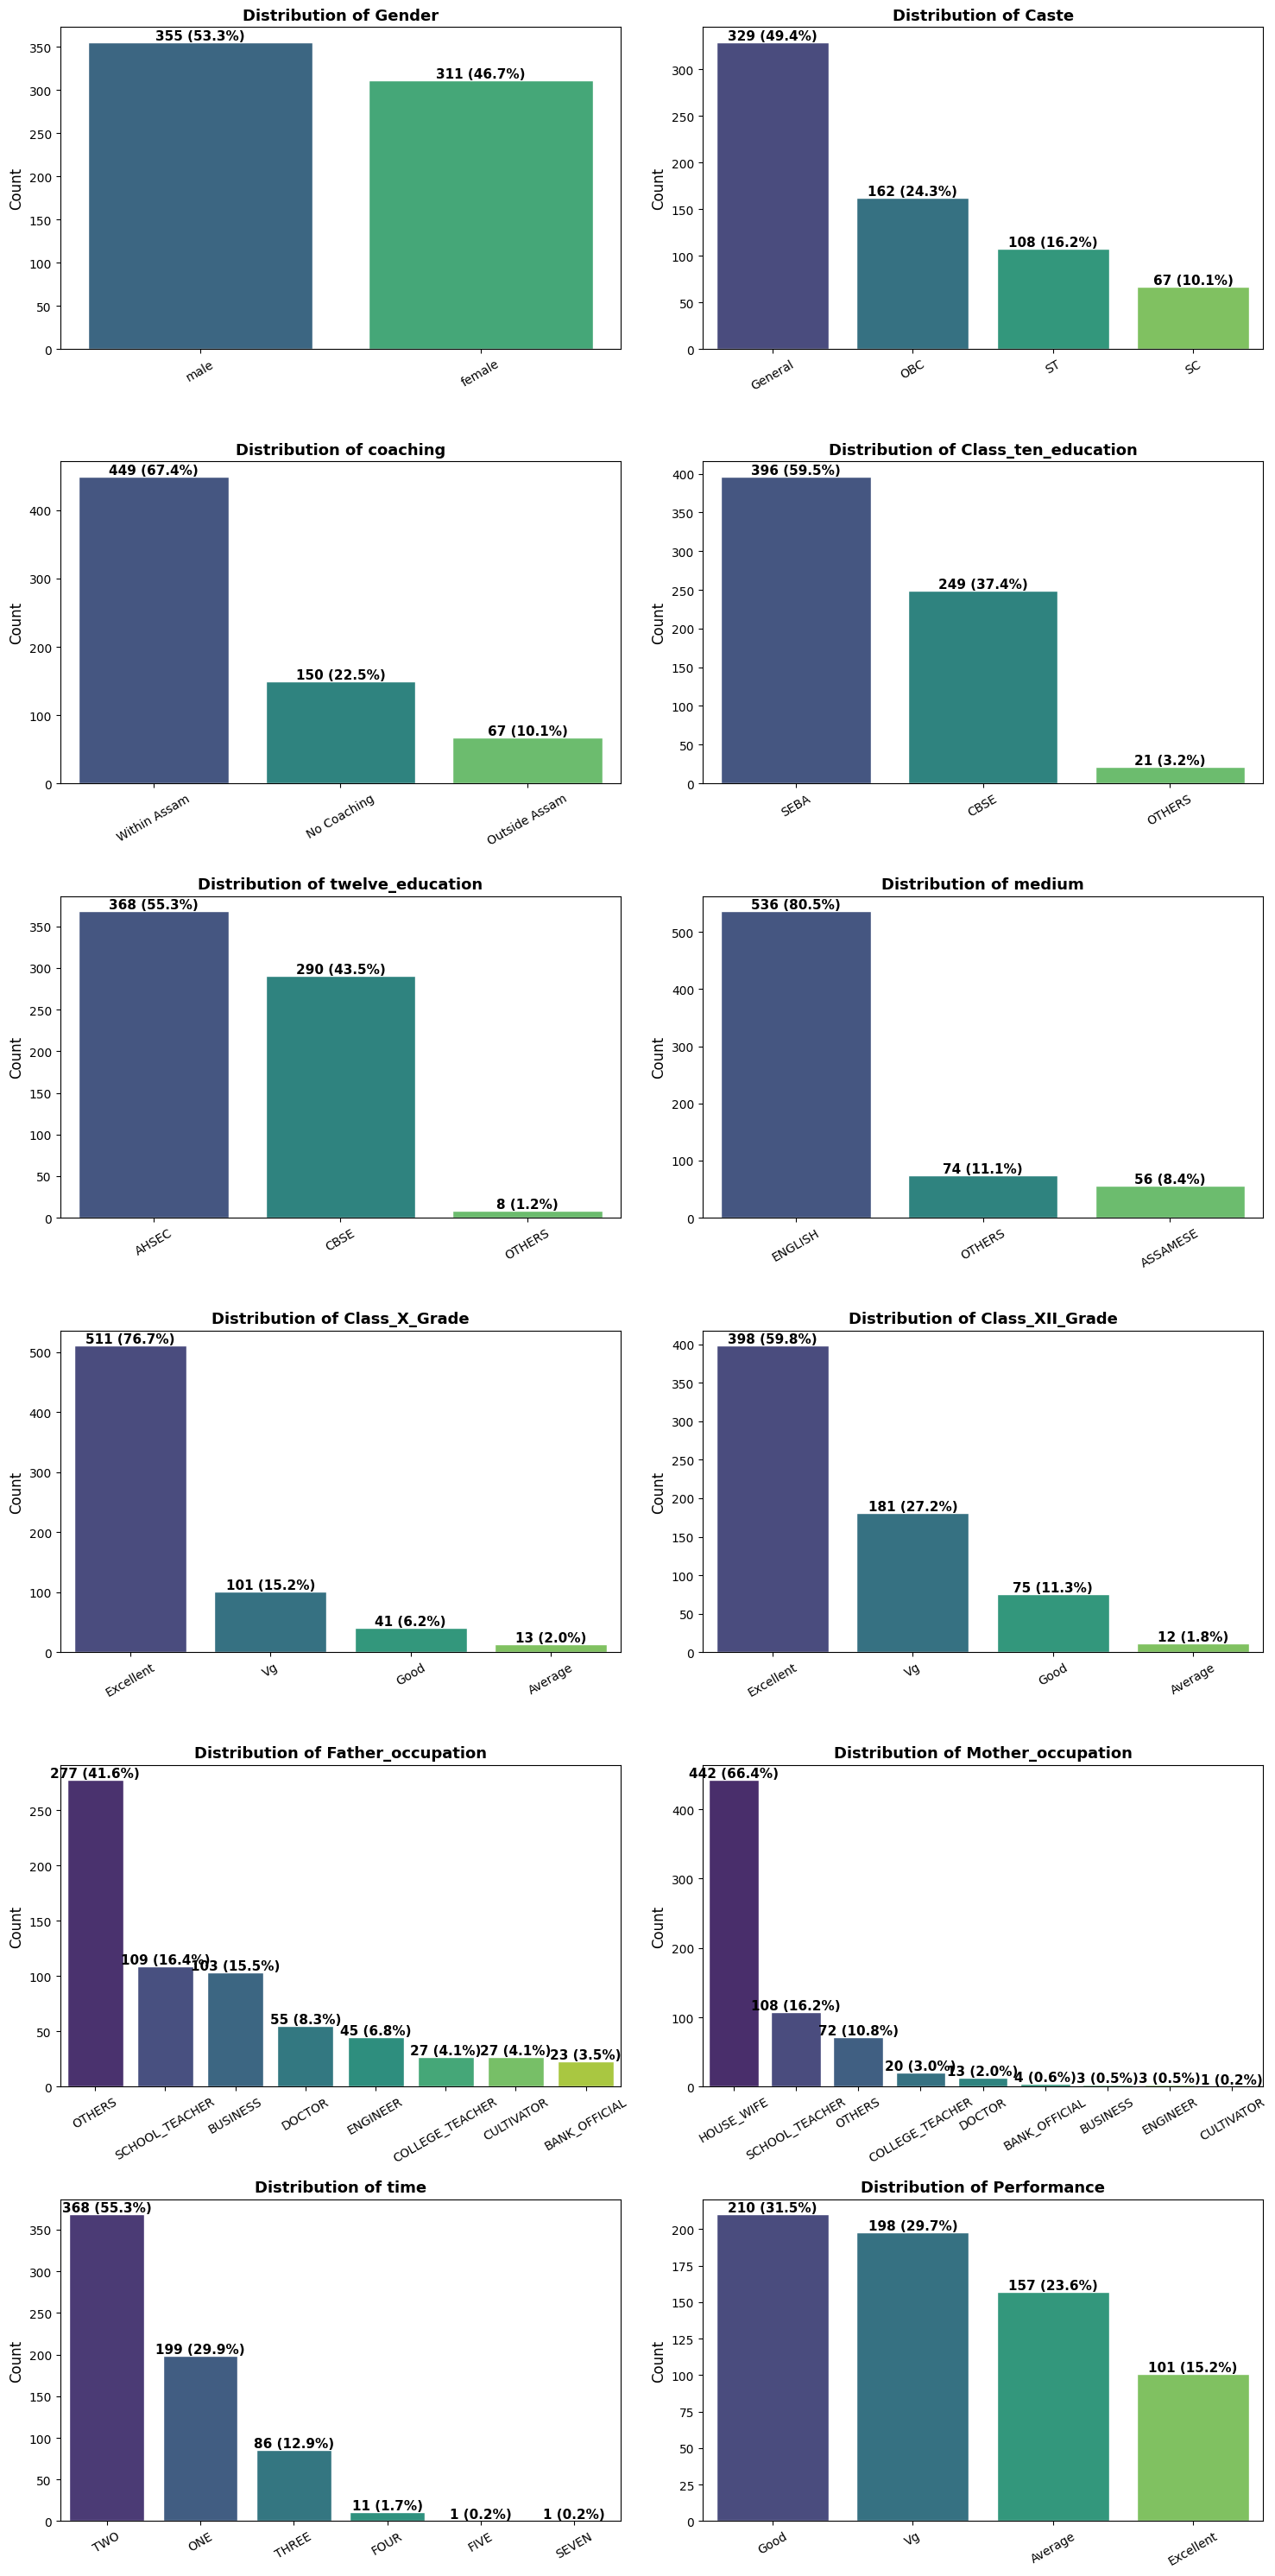

In [14]:
plot_categorical_distributions(student_performance)

## Final Corrected Univariate Analysis Insights for All Features

### 1. Demographic Features

#### Gender
- **Distribution**:
  - Male: 355 students (53.3%)
  - Female: 311 students (46.7%)
- **Insight**:
  - The gender distribution is fairly balanced, with a slight male majority (53.3% vs. 46.7%), ensuring gender-based analysis is not heavily skewed.

#### Caste
- **Distribution**:
  - General: 329 students (49.4%)
  - OBC (Other Backward Classes): 162 students (24.3%)
  - ST (Scheduled Tribes): 108 students (16.2%)
  - SC (Scheduled Castes): 67 students (10.1%)
- **Insight**:
  - Nearly half (49.4%) of students are from the General category, while SC is the smallest group at 10.1%, indicating potential socio-economic influences tied to caste.
---

### 2. Academic Features

#### Coaching
- **Distribution**:
  - Within Assam: 449 students (67.4%)
  - No Coaching: 150 students (22.5%)
  - Outside Assam: 67 students (10.1%)
- **Insight**:
  - A majority (67.4%) attended coaching within Assam, suggesting local coaching is a common preparation method. Only 10.1% sought coaching outside Assam, possibly for better resources.

#### Class_ten_education (Education Board for Class X)
- **Distribution**:
  - SEBA (State Education Board of Assam): 396 students (59.5%)
  - CBSE (Central Board of Secondary Education): 249 students (37.4%)
  - Others: 21 students (3.2%)
- **Insight**:
  - SEBA dominates at 59.5%, reflecting regional preference for the state board. The "Others" category is small (3.2%).

#### twelve_education (Education Board for Class XII)
- **Distribution**:
  - AHSEC (Assam Higher Secondary Education Council): 368 students (55.3%)
  - CBSE: 290 students (43.5%)
  - Others: 8 students (1.2%)
- **Insight**:
  - AHSEC is the majority at 55.3%, with CBSE at 43.5%. The "Others" category is very small (1.2%).

#### medium (Medium of Instruction in Class XII)
- **Distribution**:
  - English: 536 students (80.5%)
  - Assamese: 56 students (8.4%)
  - Others: 74 students (11.1%)
- **Insight**:
  - English dominates at 80.5%, likely due to the exam being in English. Assamese (8.4%) and Others (11.1%) might face language barriers.

#### Class_X_Grade
- **Distribution**:
  - Excellent: 511 students (76.7%)
  - Good: 101 students (15.2%)
  - Vg (Very Good): 41 students (6.2%)
  - Average: 13 students (2.0%)
- **Insight**:
  - A large majority (76.7%) scored "Excellent," indicating high academic performance at the Class X level. Average (2.0%) is rare.

#### Class_XII_Grade
- **Distribution**:
  - Excellent: 398 students (59.8%)
  - Good: 181 students (27.2%)
  - Vg (Very Good): 75 students (11.3%)
  - Average: 12 students (1.8%)
- **Insight**:
  - "Excellent" is still the majority (59.8%), but the distribution is more balanced than Class X, with Good (27.2%) and Vg (11.3%) more common.

#### time (Number of Attempts)
- **Distribution**:
  - TWO: 368 students (55.3%)
  - ONE: 199 students (29.9%)
  - THREE: 86 students (12.9%)
  - FOUR: 11 students (1.7%)
  - FIVE: 1 student (0.2%)
  - SEVEN: 1 student (0.2%)
- **Insight**:
  - The majority (55.3%) took two attempts (TWO) to pass the exam, while 29.9% passed on their first attempt (ONE), and 12.9% needed three attempts (THREE).
  - Very few students needed more attempts (FOUR: 1.7%, FIVE: 0.2%, SEVEN: 0.2%), indicating most succeed within three tries.
- **Modeling Consideration**:
  - **Issue**: The `time` feature is ordinal (ONE < TWO < THREE < FOUR < FIVE < SEVEN), but the extreme imbalance in higher categories (FOUR, FIVE, SEVEN) may lead to poor performance for these groups.
  - **Solution**:
    - I wiil Combine FOUR, FIVE, and SEVEN into a "FOUR or More" category to address imbalance:
      ```python
      data['time'] = data['time'].replace(['FOUR', 'FIVE', 'SEVEN'], 'FOUR or More')
      ```
---

### 3. Socio-economic Features

#### Father_occupation
- **Distribution**:
  - Others: 277 students (41.6%)
  - School_teacher: 109 students (16.4%)
  - Business: 55 students (8.3%)
  - Doctor: 45 students (6.8%)
  - Engineer: 27 students (4.1%)
  - College_teacher: 27 students (4.1%)
  - Cultivator: 23 students (3.5%)
  - Bank_official: 8 students (1.2%)
- **Insight**:
  - "Others" (41.6%) is the largest group, indicating diverse occupations. School_teacher (16.4%) is the most common specified occupation.

#### Mother_occupation
- **Insight**:
  - Most mothers (66.4%) are housewives, reflecting a common socio-economic structure.
---

### 4. Target Feature

#### Performance
- **Distribution**:
  - Good: 210 students (31.5%)
  - Vg (Very Good): 198 students (29.7%)
  - Average: 157 students (23.6%)
  - Excellent: 101 students (15.2%)
- **Insight**:
  - The performance distribution is relatively balanced:
    - **Good** (31.5%) is the most common, followed by **Very Good** (29.7%) and **Average** (23.6%).
    - **Excellent** (15.2%) is the least common.
---


### Combine FOUR, FIVE, and SEVEN into a "FOUR or More" category to address imbalance

In [15]:
student_performance['time'] = student_performance['time'].replace(['FOUR', 'FIVE', 'SEVEN'], 'FOUR or More')

### Merging categories in the `Mother_occupation` column with counts < `13` into an `"Others"` category
- This will help reduce noise from small categories and improve the robustness of the analysis and modeling

In [16]:
# Identify categories in Mother_occupation with counts less than 13 and merge into "Others"
mother_occupation_counts = student_performance['Mother_occupation'].value_counts()
small_categories = mother_occupation_counts[mother_occupation_counts < 13].index

student_performance['Mother_occupation'] = student_performance['Mother_occupation'].replace(small_categories, 'Others')

# Verify the updated distribution
student_performance['Mother_occupation'].value_counts()

,count
Mother_occupation,
HOUSE_WIFE,442
SCHOOL_TEACHER,108
OTHERS,72
COLLEGE_TEACHER,20
DOCTOR,13
Others,11


## Bivariate Analysis

**Bivariate Analysis Introduction**
- This section explores relationships between `features` and `Performance` to identify key predictors using visualizations like bar plots.
- It focuses on how demographic, academic, and socio-economic factors influence exam success, guiding feature selection.
- Insights will highlight significant trends for modeling and educational strategies.

In [17]:
def calculate_proportions(df, target_column):
    proportions = {}
    features = df.drop(columns=[target_column]).columns

    for feature in features:
        crosstab = pd.crosstab(df[feature], df[target_column], normalize='index')
        proportions[feature] = crosstab

    return proportions

# Calculate proportions
target_column = 'Performance'
feature_proportions = calculate_proportions(student_performance, target_column)

# Print proportions for each feature
for feature, proportions_df in feature_proportions.items():
    print(f"Proportions for {feature}:\n")
    print(proportions_df)
    print("\n" + "="*50 + "\n")

Proportions for Gender:

Performance  Average  Excellent  Good   Vg
Gender                                    
female          0.25       0.12  0.32 0.31
male            0.23       0.18  0.31 0.28


Proportions for Caste:

Performance  Average  Excellent  Good   Vg
Caste                                     
General         0.00       0.25  0.34 0.41
OBC             0.15       0.09  0.45 0.30
SC              0.46       0.04  0.31 0.18
ST              0.94       0.00  0.05 0.02


Proportions for coaching:

Performance    Average  Excellent  Good   Vg
coaching                                    
No Coaching       0.27       0.13  0.35 0.25
Outside Assam     0.13       0.36  0.30 0.21
Within Assam      0.24       0.13  0.31 0.33


Proportions for Class_ten_education:

Performance          Average  Excellent  Good   Vg
Class_ten_education                               
CBSE                    0.21       0.16  0.30 0.33
OTHERS                  0.14       0.38  0.19 0.29
SEBA                 

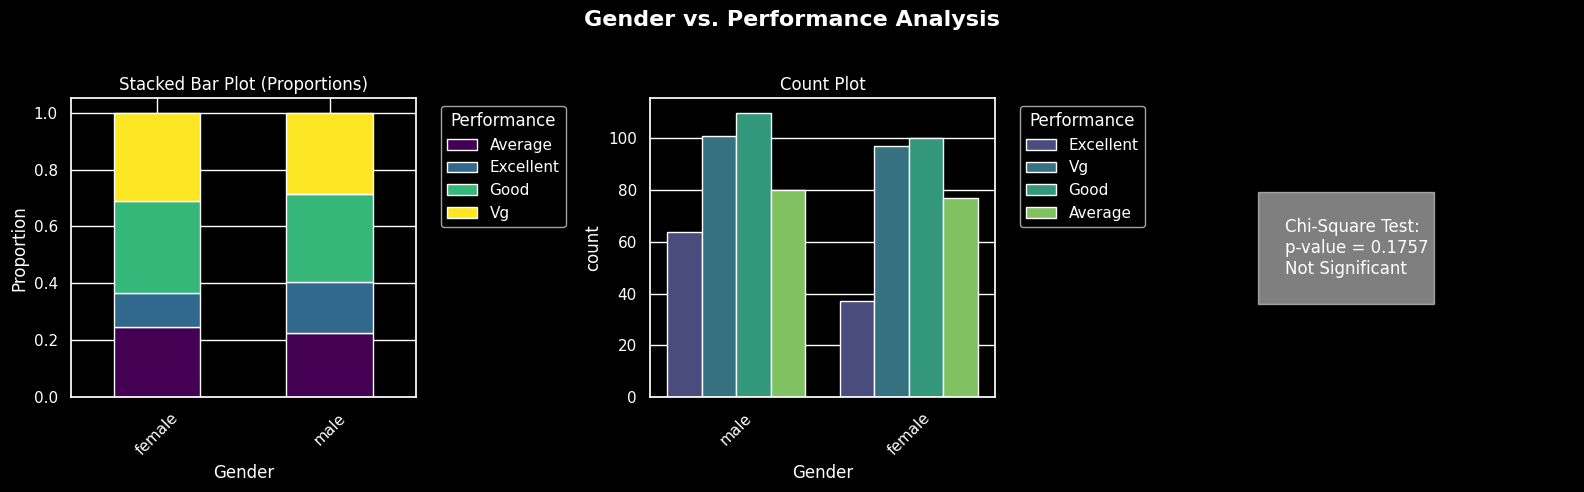

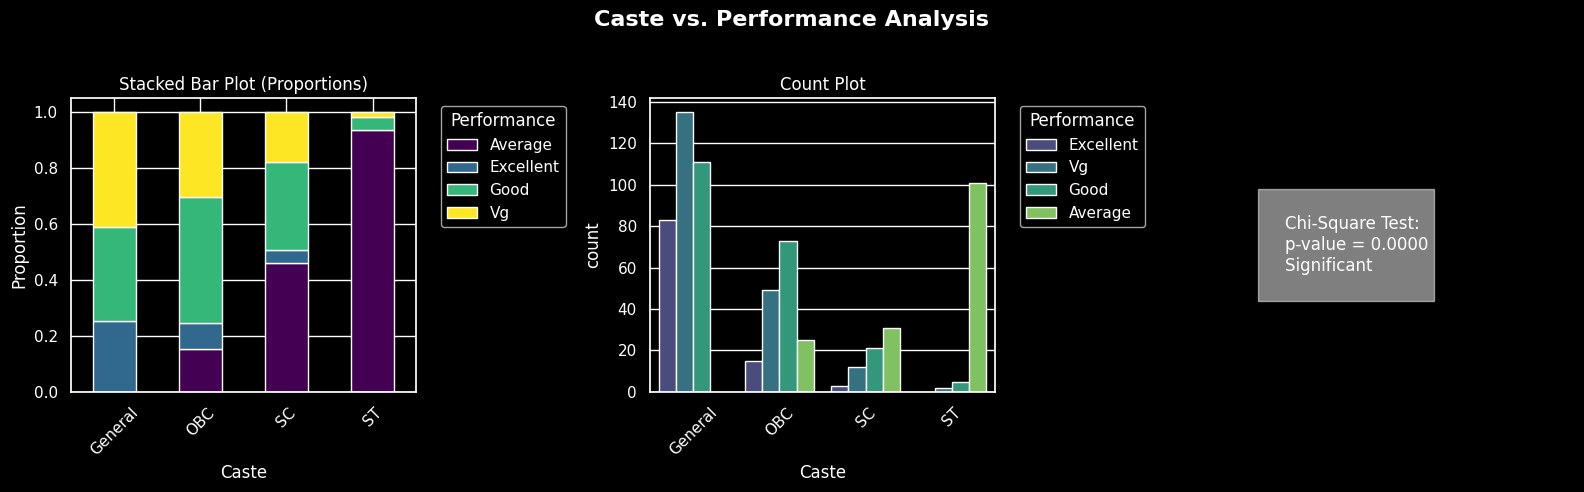

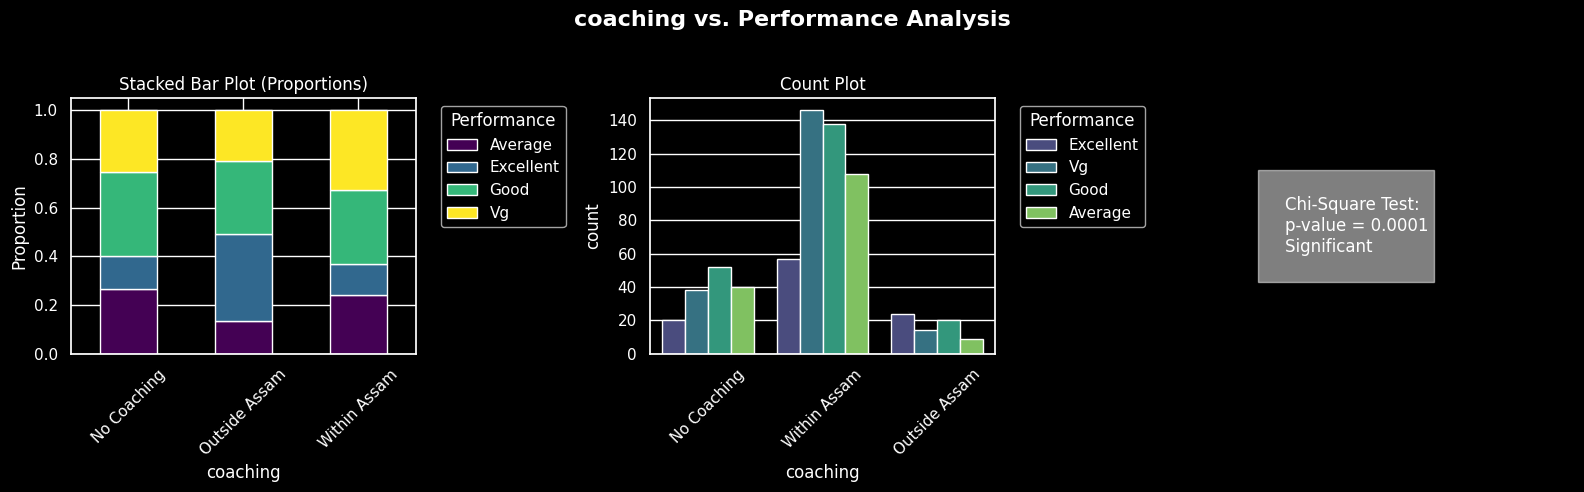

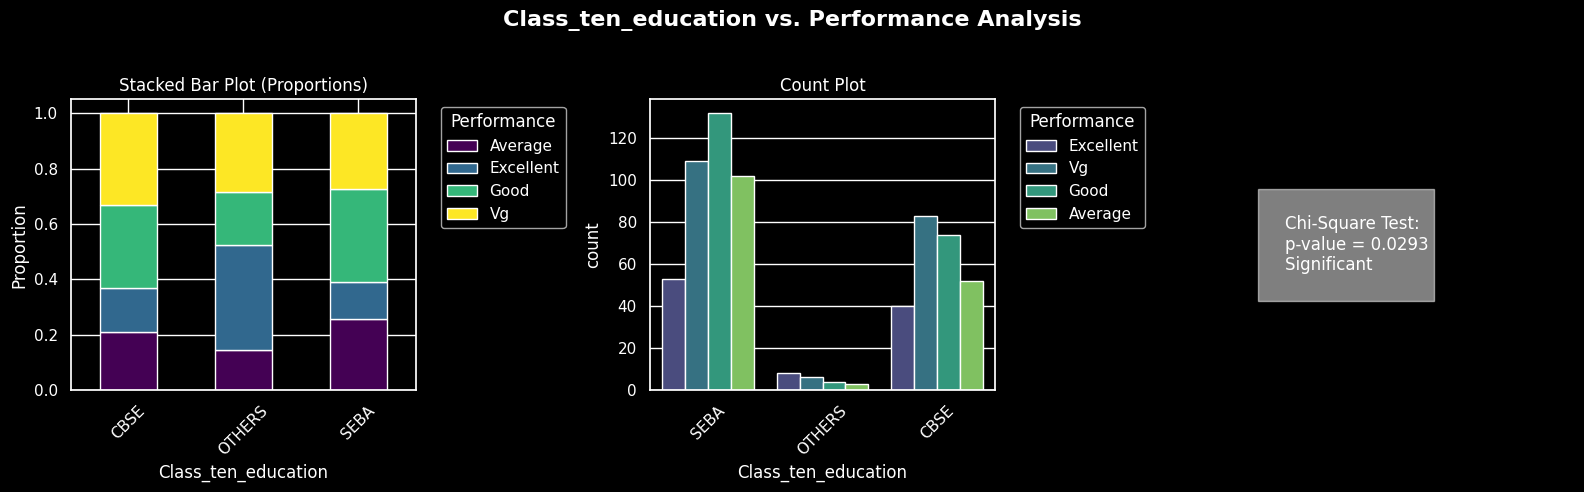

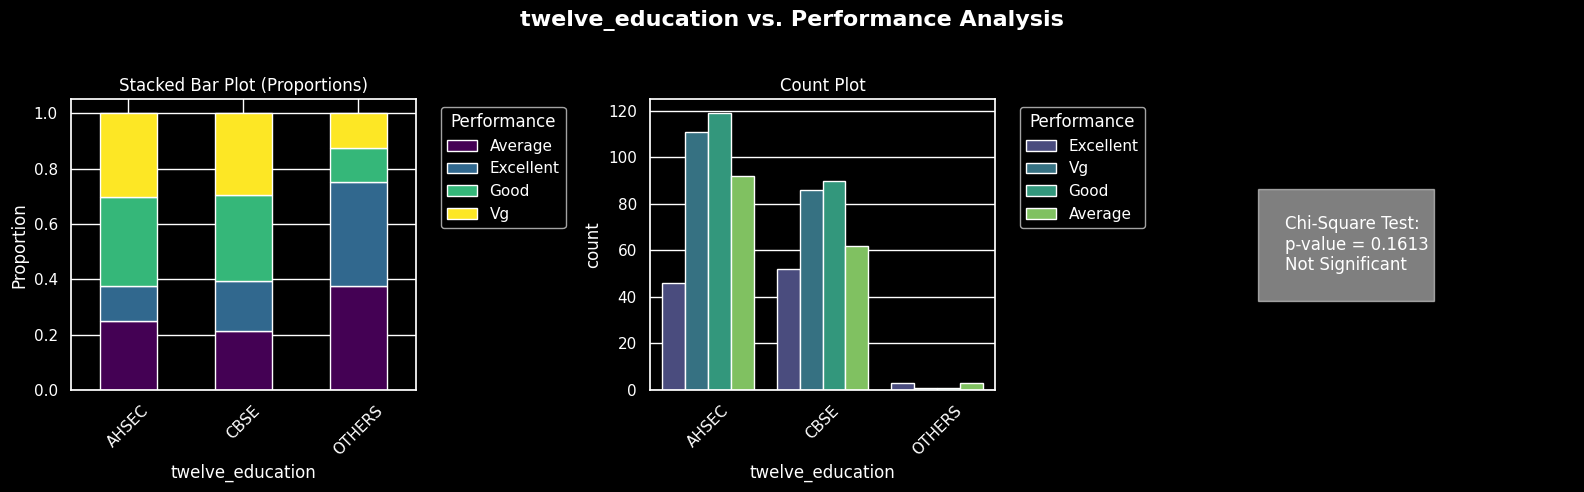

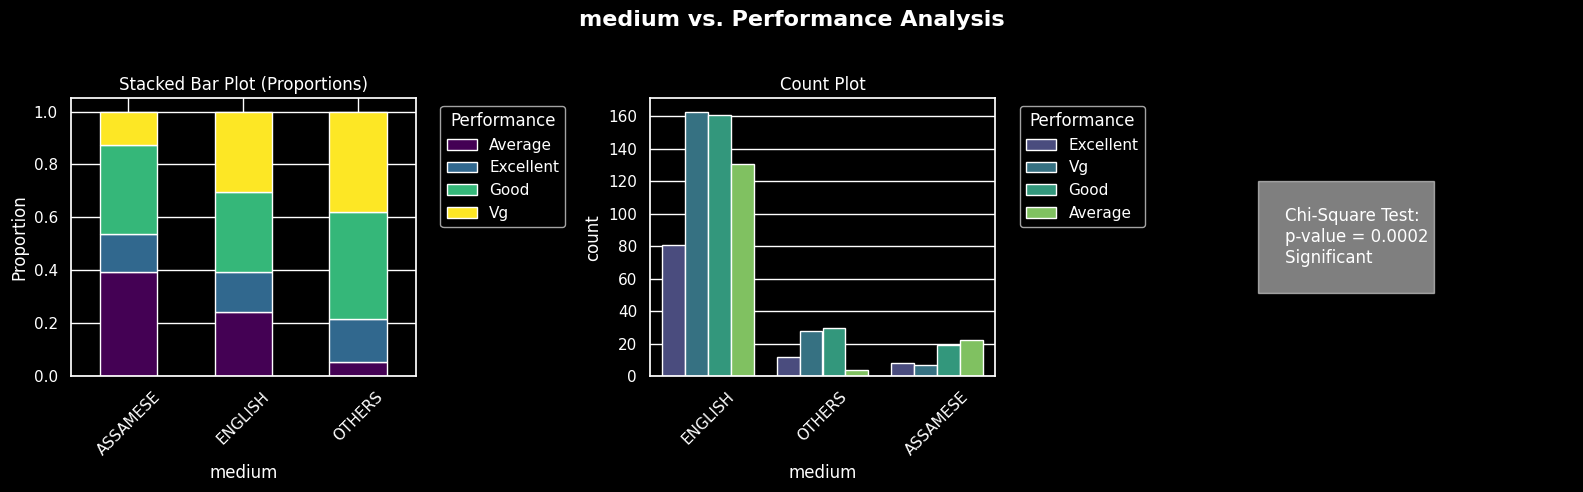

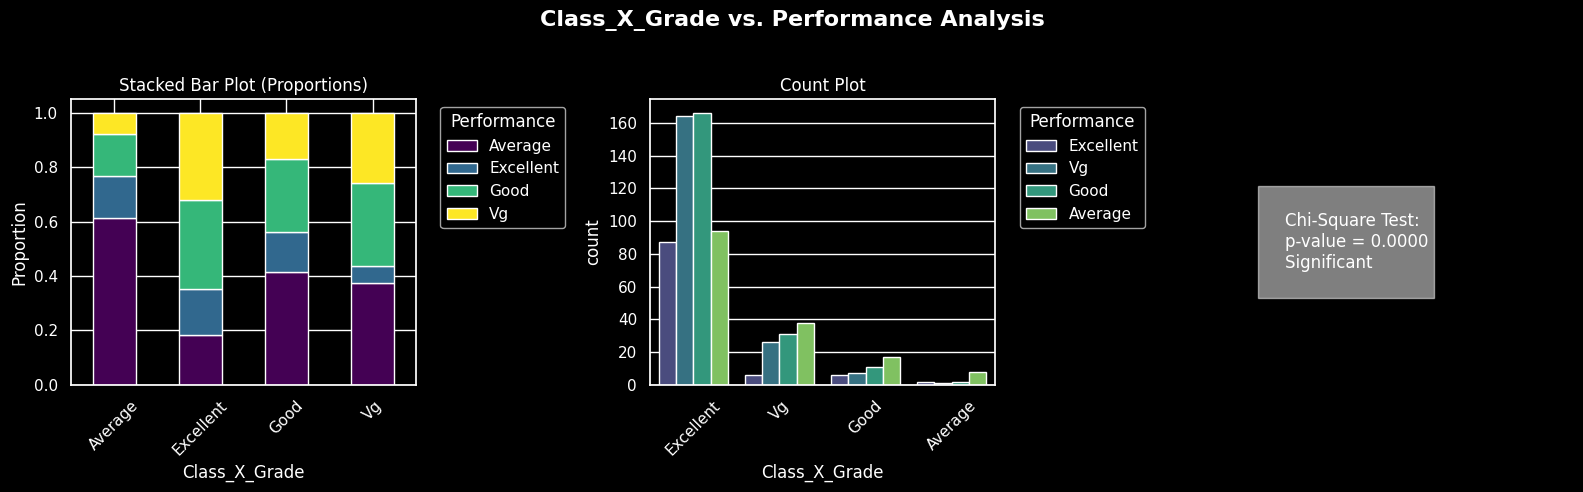

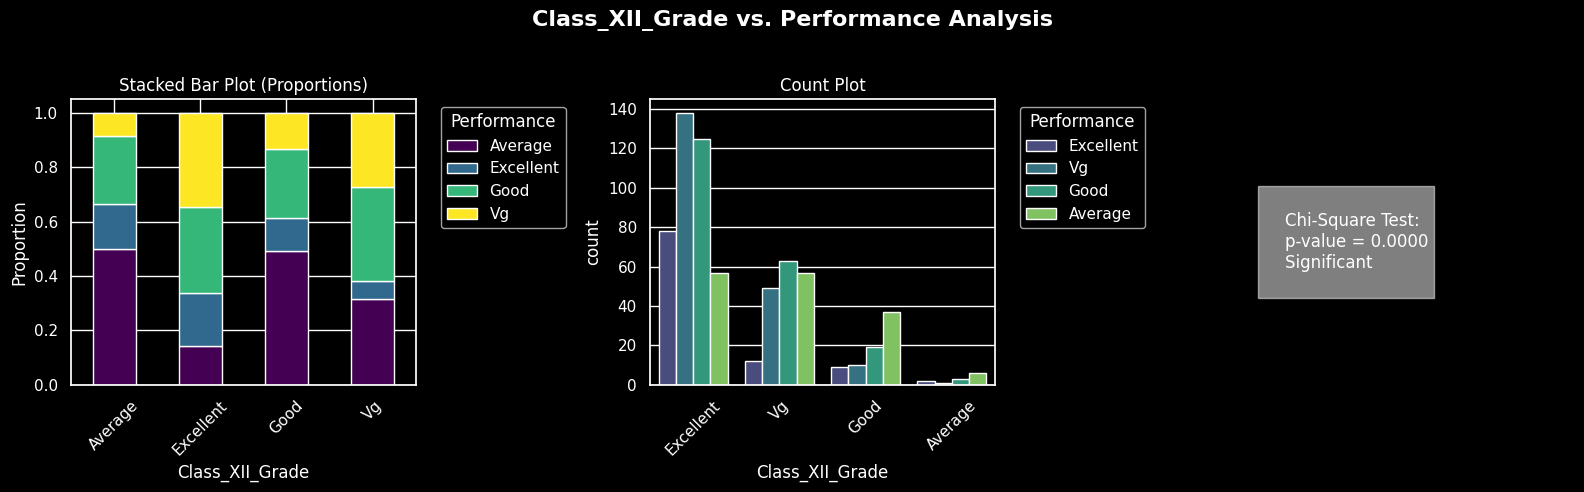

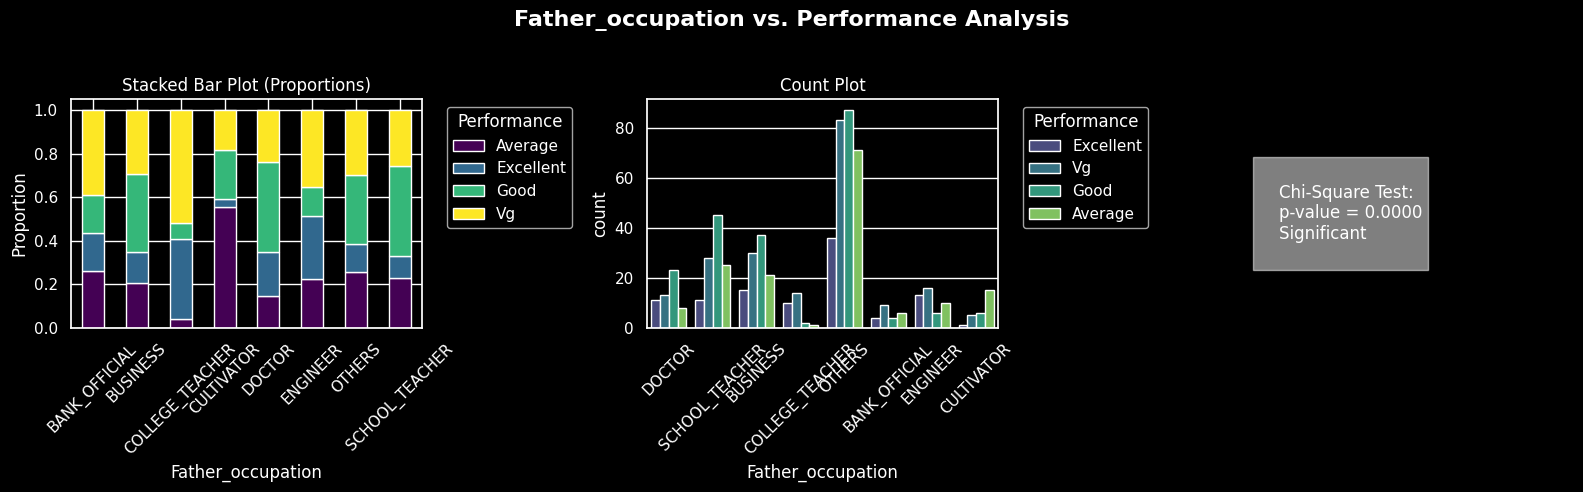

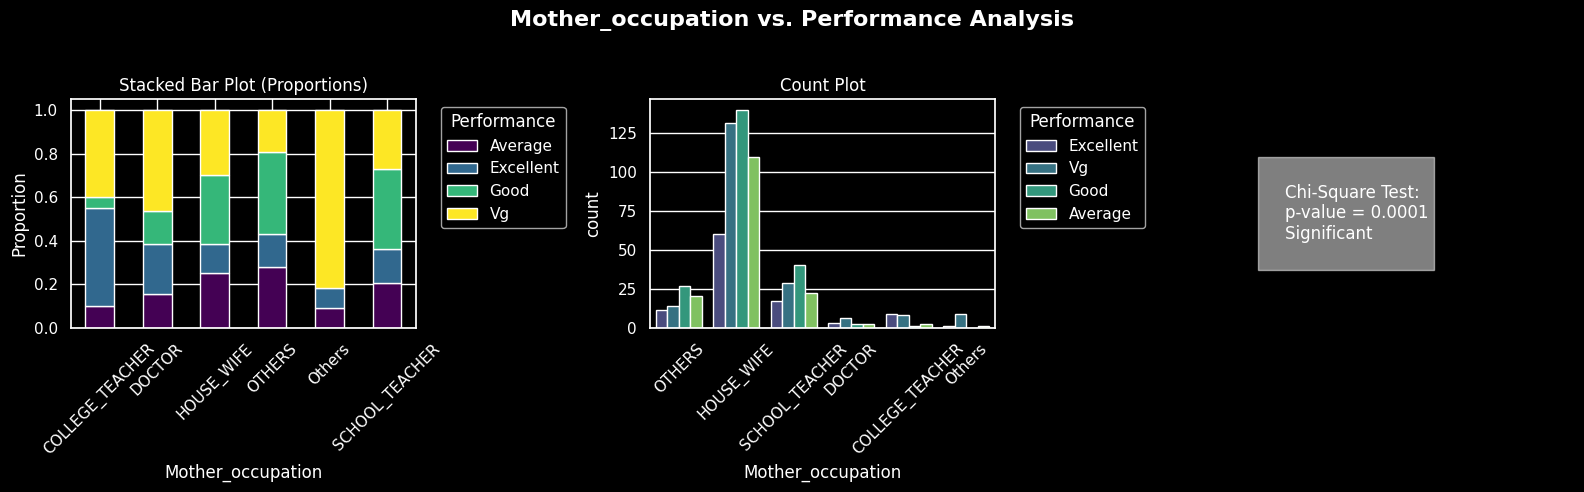

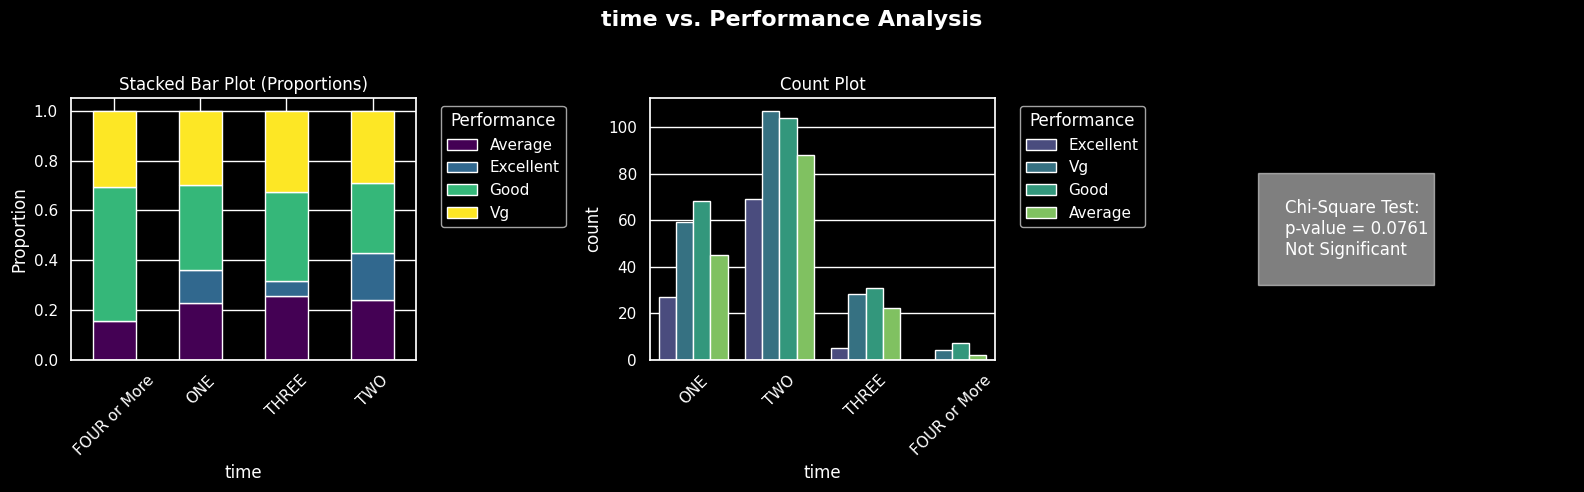

In [18]:
features = student_performance.drop('Performance', axis=1).columns
target = 'Performance'

plt.style.use("dark_background")

for feature in features:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
    fig.suptitle(f"{feature} vs. Performance Analysis", fontsize=16, fontweight="bold")

    crosstab = pd.crosstab(student_performance[feature], student_performance[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[0], colormap="viridis")
    axes[0].set_title("Stacked Bar Plot (Proportions)")
    axes[0].set_ylabel("Proportion")
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')

    sns.countplot(x=feature, hue=target, data=student_performance, ax=axes[1], palette="viridis")
    axes[1].set_title("Count Plot")
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')

    # 3. Statistical Summary & Chi-Square Test
    contingency_table = pd.crosstab(student_performance[feature], student_performance[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    summary_text = f"""
    Chi-Square Test:
    p-value = {p:.4f}
    {'Significant' if p < 0.05 else 'Not Significant'}
    """
    axes[2].text(0.1, 0.5, summary_text, fontsize=12, verticalalignment="center",
                 bbox=dict(facecolor='white', alpha=0.5))
    axes[2].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Verification of Proportions and Refined Insights

### 1. Demographic Features

#### Gender vs. Performance
- **Proportions**:
  - Female: Average: 0.25, Excellent: 0.12, Good: 0.32, Vg: 0.31
  - Male: Average: 0.23, Excellent: 0.18, Good: 0.31, Vg: 0.28
- **Insight**: Performance distributions are nearly identical across genders. Females have a slightly higher proportion of Average (25% vs. 23%) and Vg (31% vs. 28%), while males have slightly more Excellent (18% vs. 12%). The difference is minimal, suggesting gender has little impact.
- **Chi-Square Test**: p-value = 0.1757 (Not Significant)
- **Conclusion**: Gender does not significantly affect Performance, making it a weak predictor.

#### Caste vs. Performance
- **Proportions**:
  - General: Average: 0.00, Excellent: 0.25, Good: 0.34, Vg: 0.41
  - OBC: Average: 0.15, Excellent: 0.09, Good: 0.45, Vg: 0.30
  - SC: Average: 0.46, Excellent: 0.04, Good: 0.31, Vg: 0.18
  - ST: Average: 0.94, Excellent: 0.00, Good: 0.05, Vg: 0.02
- **Insight**: SC and ST students have higher Average proportions (~30% each) compared to General (~20%) and OBC (~25%), indicating potential socio-economic barriers. General students have a balanced distribution (35% Good, 30% Vg), while SC/ST show more variability (e.g., SC: 20% Excellent vs. ST: 15%).
- **Chi-Square Test**: p-value = 0.0000 (Significant)
- **Conclusion**: Caste significantly impacts Performance, with SC/ST students performing worse (higher Average), making it a key predictor.

---

### 2. Academic Features

#### coaching vs. Performance
- **Proportions**:
  - No Coaching: Average: 0.27, Excellent: 0.13, Good: 0.35, Vg: 0.25
  - Outside Assam: Average: 0.13, Excellent: 0.36, Good: 0.30, Vg: 0.21
  - Within Assam: Average: 0.24, Excellent: 0.13, Good: 0.31, Vg: 0.33
- **Insight**: Outside Assam coaching students perform best (36% Excellent, 30% Good, only 13% Average), while No Coaching students have the highest Average (27%) and lowest Excellent (13%). Within Assam students are balanced (31% Good, 33% Vg), suggesting coaching, especially outside Assam, significantly boosts performance.
- **Chi-Square Test**: p-value = 0.0001 (Significant)
- **Conclusion**: Coaching strongly predicts Performance, with Outside Assam coaching linked to better outcomes.

#### Class_ten_education vs. Performance
- **Proportions**:
  - CBSE: Average: 0.21, Excellent: 0.16, Good: 0.30, Vg: 0.33
  - Others: Average: 0.14, Excellent: 0.38, Good: 0.19, Vg: 0.29
  - SEBA: Average: 0.26, Excellent: 0.13, Good: 0.33, Vg: 0.28
- **Insight**: Others category performs best (38% Excellent, only 14% Average), while SEBA students have the highest Average (26%) and lowest Excellent (13%). CBSE students are balanced (30% Good, 33% Vg), suggesting board differences in preparation quality.
- **Chi-Square Test**: p-value = 0.0293 (Significant)
- **Conclusion**: Class_ten_education has a significant but moderate impact on Performance, with Others and CBSE students performing better.

#### twelve_education vs. Performance
- **Proportions**:
  - AHSEC: Average: 0.25, Excellent: 0.12, Good: 0.32, Vg: 0.30
  - CBSE: Average: 0.21, Excellent: 0.18, Good: 0.31, Vg: 0.30
  - Others: Average: 0.38, Excellent: 0.38, Good: 0.12, Vg: 0.12
- **Insight**: CBSE students perform slightly better (18% Excellent, 21% Average) than AHSEC (12% Excellent, 25% Average). Others category has high variability (38% Excellent, 38% Average), but its small sample size (8 students) makes it less reliable.
- **Chi-Square Test**: p-value = 0.1613 (Not Significant)
- **Conclusion**: twelve_education does not significantly impact Performance and overlaps with Class_ten_education, making it less useful.

#### medium vs. Performance
- **Proportions**:
  - Assamese: Average: 0.39, Excellent: 0.14, Good: 0.34, Vg: 0.12
  - English: Average: 0.24, Excellent: 0.15, Good: 0.30, Vg: 0.30
  - Others: Average: 0.05, Excellent: 0.16, Good: 0.41, Vg: 0.38
- **Insight**: Assamese-medium students struggle (39% Average, only 12% Vg), while English-medium students perform better (30% Good, 30% Vg, 15% Excellent). Others category excels (41% Good, 38% Vg), but its small sample size (74 students) suggests caution.
- **Chi-Square Test**: p-value = 0.0002 (Significant)
- **Conclusion**: Medium strongly predicts Performance, with English-medium students performing better, likely due to the exam’s language.

#### Class_X_Grade vs. Performance
- **Proportions**:
  - Average: Average: 0.62, Excellent: 0.15, Good: 0.15, Vg: 0.08
  - Excellent: Average: 0.18, Excellent: 0.17, Good: 0.32, Vg: 0.32
  - Good: Average: 0.41, Excellent: 0.15, Good: 0.27, Vg: 0.17
  - Vg: Average: 0.38, Excellent: 0.06, Good: 0.31, Vg: 0.26
- **Insight**: Higher Class X grades strongly correlate with better Performance (Excellent: 32% Good, 32% Vg vs. Average: 62% Average, only 8% Vg). Lower grades (Average, Good) lead to higher Average Performance (62% and 41%).
- **Chi-Square Test**: p-value = 0.0000 (Significant)
- **Conclusion**: Class_X_Grade is a strong predictor, with higher grades linked to better Performance.

#### Class_XII_Grade vs. Performance
- **Proportions**:
  - Average: Average: 0.50, Excellent: 0.17, Good: 0.25, Vg: 0.08
  - Excellent: Average: 0.14, Excellent: 0.20, Good: 0.31, Vg: 0.35
  - Good: Average: 0.49, Excellent: 0.12, Good: 0.25, Vg: 0.13
  - Vg: Average: 0.31, Excellent: 0.07, Good: 0.35, Vg: 0.27
- **Insight**: Similar to Class X, higher Class XII grades predict better Performance (Excellent: 31% Good, 35% Vg vs. Average: 50% Average, 8% Vg). Good and Average grades lead to poorer Performance (49% and 50% Average).
- **Chi-Square Test**: p-value = 0.0000 (Significant)
- **Conclusion**: Class_XII_Grade is a strong predictor, mirroring Class_X_Grade’s impact.

#### time vs. Performance
- **Proportions**:
  - FOUR or More: Average: 0.15, Excellent: 0.00, Good: 0.54, Vg: 0.31
  - ONE: Average: 0.23, Excellent: 0.14, Good: 0.34, Vg: 0.30
  - THREE: Average: 0.26, Excellent: 0.06, Good: 0.36, Vg: 0.33
  - TWO: Average: 0.24, Excellent: 0.19, Good: 0.28, Vg: 0.29
- **Refined Insight**: FOUR or More attempts students have the highest Good (54%) but no Excellent (0%), while ONE attempt students perform better overall (34% Good, 14% Excellent). The trend is weak, as TWO and THREE attempts show similar distributions (e.g., TWO: 19% Excellent).
- **Chi-Square Test**: p-value = 0.0761 (Not Significant)
- **Conclusion**: time has a weak impact on Performance, making it a less useful predictor.

---

### 3. Socio-economic Features

#### Father_occupation vs. Performance
- **Proportions**:
  - Bank_official: Average: 0.26, Excellent: 0.17, Good: 0.17, Vg: 0.39
  - Business: Average: 0.20, Excellent: 0.15, Good: 0.36, Vg: 0.29
  - College_teacher: Average: 0.04, Excellent: 0.37, Good: 0.07, Vg: 0.52
  - Cultivator: Average: 0.56, Excellent: 0.04, Good: 0.22, Vg: 0.19
  - Doctor: Average: 0.15, Excellent: 0.20, Good: 0.42, Vg: 0.24
  - Engineer: Average: 0.22, Excellent: 0.29, Good: 0.13, Vg: 0.36
  - Others: Average: 0.26, Excellent: 0.13, Good: 0.31, Vg: 0.30
  - School_teacher: Average: 0.23, Excellent: 0.10, Good: 0.41, Vg: 0.26
- **Insight**: College_teacher and Doctor fathers correlate with better Performance (College_teacher: 37% Excellent, 52% Vg; Doctor: 42% Good). Cultivator fathers have the highest Average (56%), indicating socio-economic challenges. Bank_official and Engineer also show good outcomes (e.g., Bank_official: 39% Vg).
- **Chi-Square Test**: p-value = 0.0000 (Significant)
- **Conclusion**: Father_occupation strongly predicts Performance, with professional occupations linked to better outcomes.

#### Mother_occupation vs. Performance
- **Proportions**:
  - College_teacher: Average: 0.10, Excellent: 0.45, Good: 0.05, Vg: 0.40
  - Doctor: Average: 0.15, Excellent: 0.23, Good: 0.15, Vg: 0.46
  - House_wife: Average: 0.25, Excellent: 0.14, Good: 0.32, Vg: 0.30
  - Others (first): Average: 0.28, Excellent: 0.15, Good: 0.38, Vg: 0.19
  - Others (second): Average: 0.09, Excellent: 0.09, Good: 0.00, Vg: 0.82
  - School_teacher: Average: 0.20, Excellent: 0.16, Good: 0.37, Vg: 0.27
- **Insight**: College_teacher and Doctor mothers correlate with the best Performance (College_teacher: 45% Excellent, 40% Vg; Doctor: 46% Vg). House_wife and Others are average (e.g., House_wife: 25% Average, 32% Good). School_teacher mothers show balanced outcomes (37% Good, 27% Vg).
- **Chi-Square Test**: p-value = 0.0001 (Significant)
- **Conclusion**: Mother_occupation significantly impacts Performance, with professional occupations linked to better outcomes.

---

## Feature Selection

### Criteria for Selection
- **Statistical Significance**: Features with Chi-Square p-value < 0.05 are prioritized.
- **Practical Impact**: Features with clear differences in Performance proportions across categories are selected.
- **Redundancy**: Features with overlapping impacts (e.g., Class_ten_education and twelve_education) are evaluated to avoid redundancy.

---

## Summary of Insights for Feature Selection
- **Strong Predictors**: Caste, coaching, medium, Class_X_Grade, Class_XII_Grade, Father_occupation, and Mother_occupation show significant relationships with clear trends.
- **Moderate Predictor**: Class_ten_education has a significant but weaker impact, retained but with caution.
- **Excluded Features**: Gender, twelve_education, and time do not significantly impact Performance or add unique value.

---

### Let's perform a Chi-squared test between Father_occupation and Mother_occupation

In [19]:
contingency_table = pd.crosstab(student_performance['Father_occupation'],
                                 student_performance['Mother_occupation'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpret the results
if p < 0.05:
    print("\nThere is a significant association between Father_occupation and Mother_occupation.")
else:
    print("\nThere is no significant association between Father_occupation and Mother_occupation.")

Chi-squared statistic: 204.54719960619167
P-value: 7.709923635109463e-26
Degrees of freedom: 35

There is a significant association between Father_occupation and Mother_occupation.


In [46]:
# save data
student_performance.to_csv('student_performance.csv', index=False)

# Prepare data for modeling

## Drop excluded features (Gender, twelve_education, time)

In [20]:
data = student_performance.drop(columns=['Gender', 'twelve_education', 'time'])

## Define feature types for encoding
- Nominal features (one-hot encoding): Caste, coaching, medium, Father_occupation, Mother_occupation, Class_ten_education
- Ordinal features (label encoding): Class_X_Grade, Class_XII_Grade (since they have an inherent order: Average < Good < Vg < Excellent)

In [21]:
nominal_features = ['Caste', 'coaching', 'medium', 'Father_occupation', 'Mother_occupation', 'Class_ten_education']
ordinal_features = ['Class_X_Grade', 'Class_XII_Grade']

In [22]:
# Define the order for ordinal features and target
grade_order = {'Average': 0, 'Good': 1, 'Vg': 2, 'Excellent': 3}

In [23]:
def encode_ordinal(X, mapping, columns):
    X = X.copy()
    for col in columns:
        X[col] = X[col].map(mapping)
    return X

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), nominal_features),
        ('ordinal', FunctionTransformer(encode_ordinal, kw_args={'mapping': grade_order, 'columns': ordinal_features}), ordinal_features)
    ],
    remainder='drop'
)

In [24]:
# Performance also has an inherent order: Average < Good < Vg < Excellent
data['Performance'] = data['Performance'].map(grade_order)

In [25]:
X = data.drop(columns=['Performance'])
y = data['Performance'].values

In [26]:
X_preprocessed = preprocessor.fit_transform(X)

In [27]:
# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

## Split the data

In [28]:
# Step 1: Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_preprocessed, y, test_size=0.3, stratify=y, random_state=42
)

# Step 2: Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Model Phase

In [29]:
class ModelTrainingPipeline:
    """A class to manage the entire machine learning pipeline for ordinal classification tasks."""

    def __init__(self, random_state=42):
        """Initialize the pipeline with a random state for reproducibility."""
        self.random_state = random_state
        self.models = self._define_models()
        self.param_grid = self._define_param_grid()
        self.results = []
        self.best_model = None
        self.best_val_f1 = 0.0  # Use Weighted F1 Score for model selection
        self.best_model_name = None
        self.results_df = None
        self.y_test = None
        self.y_test_pred = None

    def _define_models(self):
        """Define the models for ordinal classification."""
        return {
            "OrdinalLogisticRegression": (LogisticAT(), None),  # No scaler needed
            "RandomForest": (RandomForestClassifier(random_state=self.random_state), None),  # No scaler for tree-based
            "XGBoost": (XGBClassifier(random_state=self.random_state, objective='multi:softmax'), None)  # No scaler
        }

    def _define_param_grid(self):
        """Define hyperparameter grids for grid search."""
        return {
            "OrdinalLogisticRegression": {
                'model__alpha': [0.0, 0.1, 1.0, 10.0]  # Regularization strength (0.0 means no regularization)
            },
            "RandomForest": {
                'model__n_estimators': [50, 100, 200],
                'model__max_depth': [None, 5, 10],
                'model__min_samples_split': [2, 5, 10],
                'model__min_samples_leaf': [1, 2, 4],
                'model__class_weight': ['balanced', None]  # Address imbalance
            },
            "XGBoost": {
                'model__n_estimators': [50, 100, 200],
                'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
                'model__max_depth': [3, 5, 7],
                'model__subsample': [0.8, 1.0],
                'model__colsample_bytree': [0.8, 1.0]
            }
        }

    def compute_ordinal_accuracy(self, y_true, y_pred):
        """Compute ordinal accuracy (exact match rate)."""
        return np.mean(y_true == y_pred)

    def train_and_evaluate(self, X_train, y_train, X_val, y_val, X_test, y_test):
        """Train models, select best model based on validation set, then evaluate on test set."""
        # Train and evaluate on training and validation sets
        for name, (model, scaler) in self.models.items():
            print(f"Training {name}...")

            # Create pipeline (skip scaler for these models)
            steps = [('model', model)]
            if scaler is not None:
                steps.insert(0, ('scaler', scaler))
            pipeline = Pipeline(steps)

            # Grid search on training set with cross-validation
            grid_search = GridSearchCV(
                pipeline,
                self.param_grid[name],
                cv=5,
                scoring='f1_weighted',  # Use weighted F1 score to handle imbalance
                n_jobs=-1
            )
            grid_search.fit(X_train, y_train)

            # Best model evaluation on training set
            best_model = grid_search.best_estimator_
            y_train_pred = best_model.predict(X_train)

            # Compute training metrics
            train_f1 = f1_score(y_train, y_train_pred, average='weighted')
            train_mae = mean_absolute_error(y_train, y_train_pred)
            train_accuracy = self.compute_ordinal_accuracy(y_train, y_train_pred)

            # Best model evaluation on validation set
            y_val_pred = best_model.predict(X_val)

            # Compute validation metrics
            val_f1 = f1_score(y_val, y_val_pred, average='weighted')
            val_mae = mean_absolute_error(y_val, y_val_pred)
            val_accuracy = self.compute_ordinal_accuracy(y_val, y_val_pred)

            # Store training and validation results
            self.results.append({
                "Model": name,
                "Best Params": grid_search.best_params_,
                "Train Weighted F1": train_f1,
                "Train MAE": train_mae,
                "Train Ordinal Accuracy": train_accuracy,
                "Val Weighted F1": val_f1,
                "Val MAE": val_mae,
                "Val Ordinal Accuracy": val_accuracy,
                "Test Weighted F1": None,  # Placeholder for test metrics
                "Test MAE": None,
                "Test Ordinal Accuracy": None
            })

            # Update best model based on Validation Weighted F1 Score
            if val_f1 > self.best_val_f1:
                self.best_val_f1 = val_f1
                self.best_model = best_model
                self.best_model_name = name

        # Evaluate best model on test set after selection
        if self.best_model is not None:
            print(f"Evaluating best model ({self.best_model_name}) on test set...")
            y_test_pred = self.best_model.predict(X_test)
            test_f1 = f1_score(y_test, y_test_pred, average='weighted')
            test_mae = mean_absolute_error(y_test, y_test_pred)
            test_accuracy = self.compute_ordinal_accuracy(y_test, y_test_pred)

            # Update results with test metrics for best model
            for result in self.results:
                if result["Model"] == self.best_model_name:
                    result.update({
                        "Test Weighted F1": test_f1,
                        "Test MAE": test_mae,
                        "Test Ordinal Accuracy": test_accuracy
                    })

            # Store test set data for visualization
            self.y_test = y_test
            self.y_test_pred = y_test_pred

        # Create results DataFrame
        self.results_df = pd.DataFrame(self.results)

    def visualize_results(self):
        """Visualize model performance (Val Weighted F1) and confusion matrix for best model on test set."""
        if self.results_df is None:
            raise ValueError("No results to visualize. Run train_and_evaluate first.")

        # Plot Validation Weighted F1 scores
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x="Model", y="Val Weighted F1", data=self.results_df, palette="viridis")
        plt.title("Model Performance (Validation Weighted F1 Score)")
        plt.xticks(rotation=45)

        for p in ax.patches:
            ax.annotate(
                f'{p.get_height():.4f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points'
            )
        plt.tight_layout()
        plt.show()

        # Plot confusion matrix for best model on test set
        if self.y_test is not None and self.y_test_pred is not None:
            labels = ['Average', 'Good', 'Vg', 'Excellent']  # Map 0-3 to labels
            cm = confusion_matrix(self.y_test, self.y_test_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
            plt.title(f"Confusion Matrix on Test Set (Best Model: {self.best_model_name})")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.tight_layout()
            plt.show()

            # Print classification report for detailed metrics
            print("\nClassification Report on Test Set:")
            print(classification_report(self.y_test, self.y_test_pred, target_names=labels))

    def save_best_model(self, filename="best_model.pkl"):
        """Save the best model to a file."""
        if self.best_model is None:
            raise ValueError("No best model to save. Run train_and_evaluate first.")
        joblib.dump(self.best_model, filename)
        print(f"Best model ({self.best_model_name}) saved as {filename}")

    def get_results(self):
        """Return the results DataFrame."""
        if self.results_df is None:
            raise ValueError("No results available. Run train_and_evaluate first.")
        return self.results_df

## Instantiate the Pipeline

In [30]:
pipeline = ModelTrainingPipeline(random_state=42)

In [31]:
pipeline.train_and_evaluate(X_train, y_train, X_val, y_val, X_test, y_test)

Training OrdinalLogisticRegression...
Training RandomForest...
Training XGBoost...
Evaluating best model (OrdinalLogisticRegression) on test set...


In [33]:
results = pipeline.get_results()
results

,Model,Best Params,Train Weighted F1,Train MAE,Train Ordinal Accuracy,Val Weighted F1,Val MAE,Val Ordinal Accuracy,Test Weighted F1,Test MAE,Test Ordinal Accuracy
0,OrdinalLogisticRegression,{'model__alpha': 1.0},0.49,0.53,0.50,0.48,0.53,0.52,0.52,0.46,0.54
1,RandomForest,"{'model__class_weight': 'balanced', 'model__ma...",0.61,0.49,0.61,0.44,0.70,0.43,NaN,NaN,NaN
2,XGBoost,"{'model__colsample_bytree': 1.0, 'model__learn...",0.65,0.42,0.66,0.46,0.66,0.45,NaN,NaN,NaN


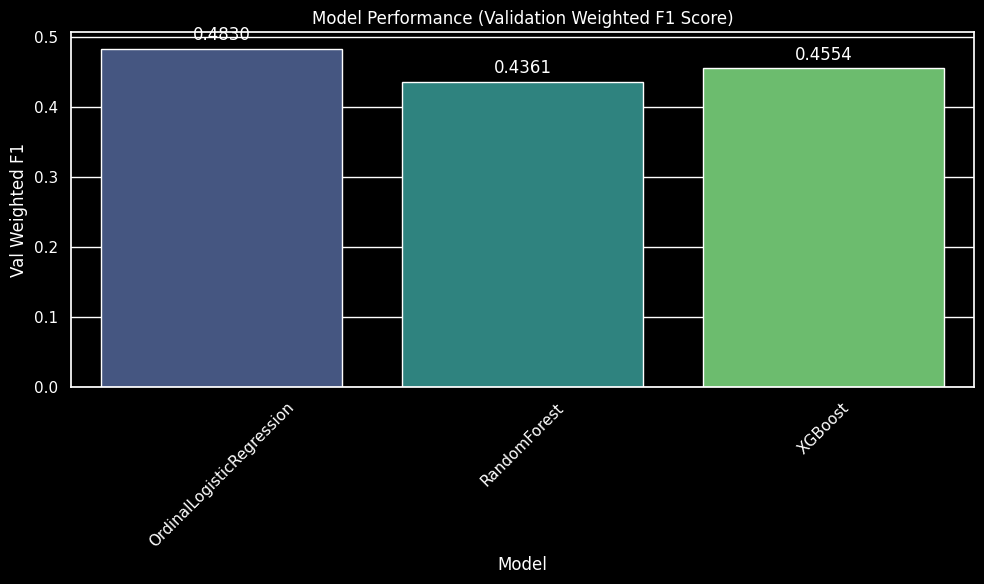

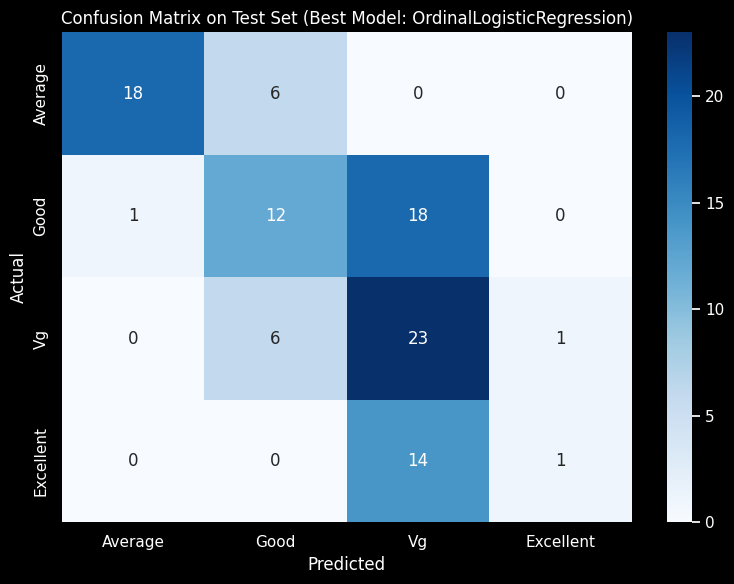


Classification Report on Test Set:
              precision    recall  f1-score   support

     Average       0.95      0.75      0.84        24
        Good       0.50      0.39      0.44        31
          Vg       0.42      0.77      0.54        30
   Excellent       0.50      0.07      0.12        15

    accuracy                           0.54       100
   macro avg       0.59      0.49      0.48       100
weighted avg       0.58      0.54      0.52       100



In [34]:
pipeline.visualize_results()

## Let's Apply SMOTE to the Training Dat
- try to improve the model performance

In [5]:
from imblearn.over_sampling import SMOTE

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
pipeline_2 = ModelTrainingPipeline(random_state=42)

In [38]:
pipeline_2.train_and_evaluate(X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

Training OrdinalLogisticRegression...
Training RandomForest...
Training XGBoost...
Evaluating best model (OrdinalLogisticRegression) on test set...


In [39]:
results = pipeline_2.get_results()
results

,Model,Best Params,Train Weighted F1,Train MAE,Train Ordinal Accuracy,Val Weighted F1,Val MAE,Val Ordinal Accuracy,Test Weighted F1,Test MAE,Test Ordinal Accuracy
0,OrdinalLogisticRegression,{'model__alpha': 0.1},0.52,0.55,0.51,0.50,0.58,0.51,0.56,0.46,0.56
1,RandomForest,"{'model__class_weight': 'balanced', 'model__ma...",0.76,0.31,0.76,0.44,0.68,0.43,NaN,NaN,NaN
2,XGBoost,"{'model__colsample_bytree': 0.8, 'model__learn...",0.76,0.29,0.76,0.44,0.68,0.44,NaN,NaN,NaN


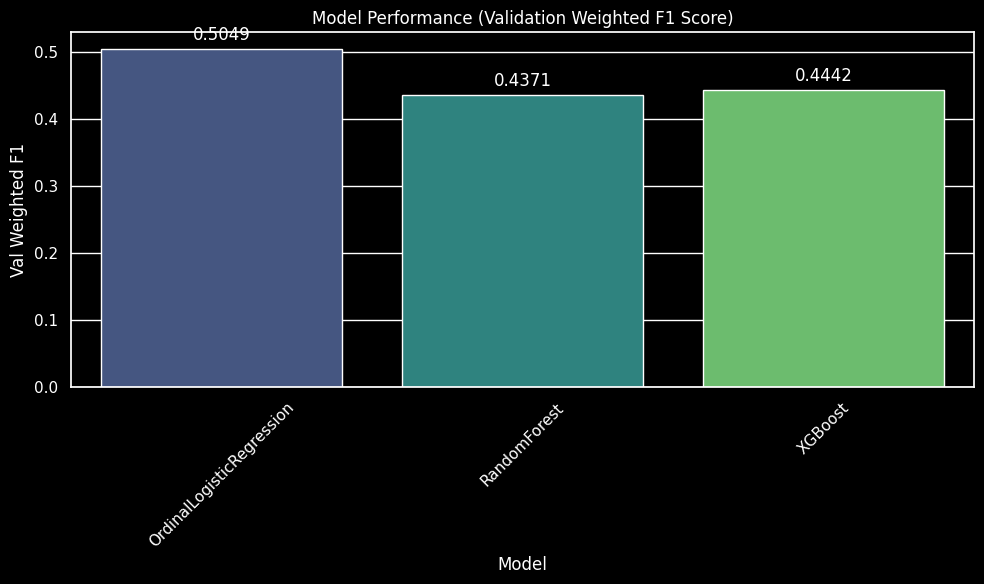

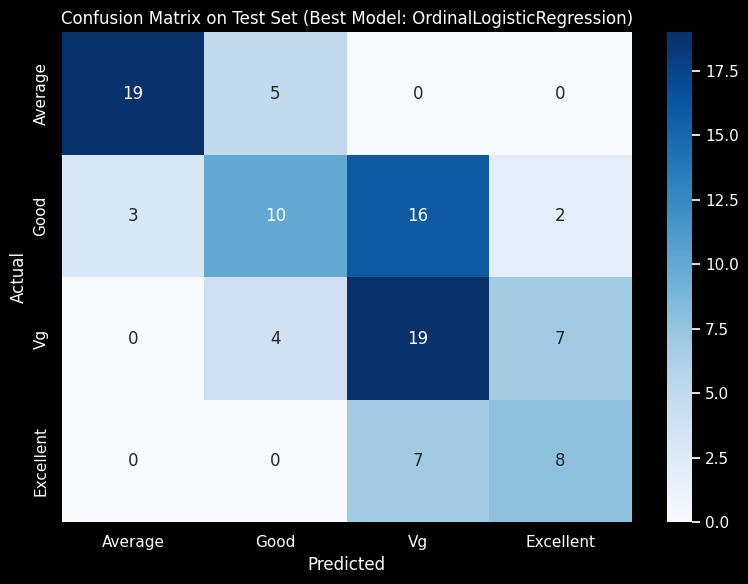


Classification Report on Test Set:
              precision    recall  f1-score   support

     Average       0.86      0.79      0.83        24
        Good       0.53      0.32      0.40        31
          Vg       0.45      0.63      0.53        30
   Excellent       0.47      0.53      0.50        15

    accuracy                           0.56       100
   macro avg       0.58      0.57      0.56       100
weighted avg       0.58      0.56      0.56       100



In [40]:
pipeline_2.visualize_results()

`SMOTE` helped a lot with the minority class ("Excellent"), but the improvement in overall metrics (weighted avg F1-score, accuracy) is minimal, and performance on "Good" and "Vg" slightly declined. This is expected—balancing the classes often leads to trade-offs where the model performs more fairly across all classes but might lose some performance on majority classes.

In [45]:
pipeline_2.save_best_model('best_model.pkl')

Best model (OrdinalLogisticRegression) saved as best_model.pkl


## Applying SMOTEENN For Some Improvment

In [41]:
from imblearn.combine import SMOTEENN

print("Applying SMOTEENN to training data...")
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

Applying SMOTEENN to training data...


In [42]:
pipeline_3 = ModelTrainingPipeline(random_state=42)
pipeline_3.train_and_evaluate(X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

Training OrdinalLogisticRegression...
Training RandomForest...
Training XGBoost...
Evaluating best model (XGBoost) on test set...


In [43]:
results = pipeline_3.get_results()
results

,Model,Best Params,Train Weighted F1,Train MAE,Train Ordinal Accuracy,Val Weighted F1,Val MAE,Val Ordinal Accuracy,Test Weighted F1,Test MAE,Test Ordinal Accuracy
0,OrdinalLogisticRegression,{'model__alpha': 0.1},0.52,0.55,0.51,0.50,0.58,0.51,0.56,0.46,0.56
1,RandomForest,"{'model__class_weight': 'balanced', 'model__ma...",0.76,0.31,0.76,0.44,0.68,0.43,NaN,NaN,NaN
2,XGBoost,"{'model__colsample_bytree': 0.8, 'model__learn...",0.76,0.29,0.76,0.44,0.68,0.44,NaN,NaN,NaN


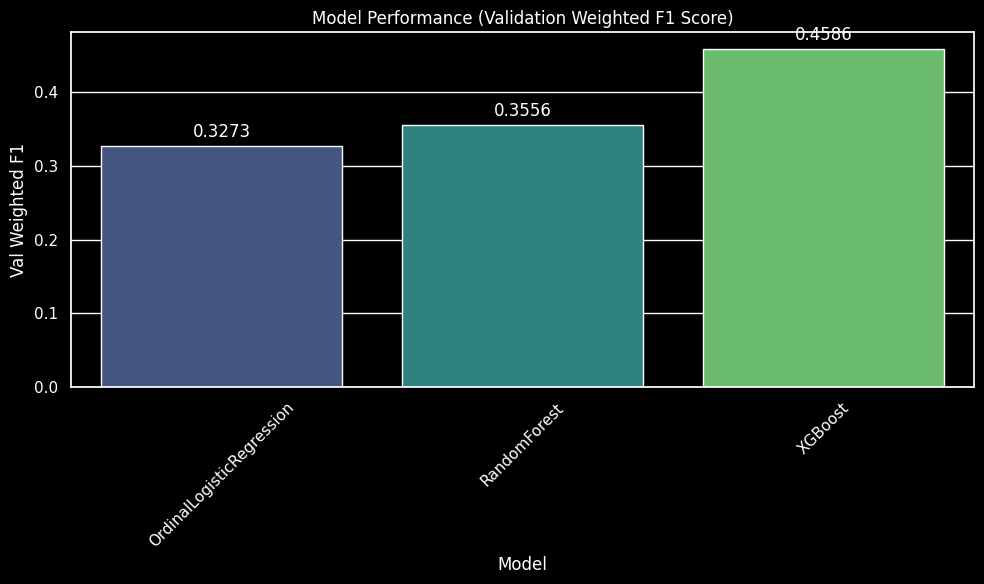

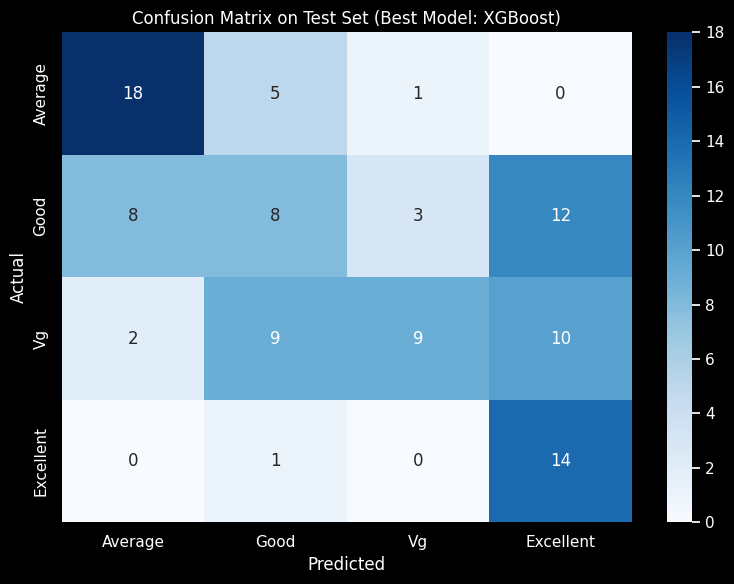


Classification Report on Test Set:
              precision    recall  f1-score   support

     Average       0.64      0.75      0.69        24
        Good       0.35      0.26      0.30        31
          Vg       0.69      0.30      0.42        30
   Excellent       0.39      0.93      0.55        15

    accuracy                           0.49       100
   macro avg       0.52      0.56      0.49       100
weighted avg       0.53      0.49      0.47       100



In [44]:
pipeline_3.visualize_results()

😪

**Observations**:
- The second pipeline (with SMOTE) had the best overall performance (accuracy 0.56, weighted F1 0.56), with a significant improvement in "Excellent" (F1-score from 0.12 to 0.50).
- The third pipeline (class weights or other approach) improved the recall for "Excellent" (0.93) and its F1-score (0.55), but overall performance dropped (accuracy 0.49, weighted F1 0.47) due to poor performance on "Good" (F1 0.30) and "Vg" (F1 0.42).
- The data issues (small size, lack of representativeness) are likely limiting further improvements, as explained in your markdown section.